In [143]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn.functional as F

In [144]:
class Logistic:
    def __init__(self, X_train, Y_train, epoch=100, learning_rate=0.01):
        self.X_train = X_train
        self.Y_train = Y_train
        self.epoch = epoch
        self.learning_rate = learning_rate
        self.Y_train = self.one_hot_encode(Y_train)
        self.num_classes = self.Y_train.shape[1]
        self.num_features = self.X_train.shape[1]
        self.Weights = np.zeros((self.num_features, self.num_classes))
        self.Bias = np.zeros((1, self.num_classes))
        self.Weights_array = []
        self.Bias_array = []
        self.Weights_array.append(self.Weights)
        self.Bias_array.append(self.Bias)


    def one_hot_encode(self, Y):
        one_hot = np.zeros((Y.size, Y.max() + 1))
        one_hot[np.arange(Y.size), Y] = 1
        return one_hot

    def train(self):
        for i in range(self.epoch):
            # print(f"Epoch {i+1} begins, value of Weights => {self.Weights}, value of Bias => {self.Bias}")
            activation = self.activation()
            # print(f"Activation => {activation}")
            grad_wrt_W = -np.matmul(self.X_train.T, (self.Y_train - activation))
            grad_wrt_B = -np.sum(self.Y_train - activation, axis=0, keepdims=True)

            self.Weights -= self.learning_rate * grad_wrt_W
            self.Bias -= self.learning_rate * grad_wrt_B

            self.Weights_array.append(self.Weights)
            self.Bias_array.append(self.Bias)

            # print(f"Epoch {i+1} ends, value of Weights => {self.Weights}, value of Bias => {self.Bias}")

            loss = self.loss(activation)
            accuracy = self.accuracy(activation)
            print(f"Epoch : {i+1} || Loss => {loss:.4f} || Accuracy => {accuracy:.4f}\n----------------------")

    def activation(self):
        linear_model = np.dot(self.X_train, self.Weights) + self.Bias
        return self.softmax(linear_model)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def loss(self, activation):
        m = self.Y_train.shape[0]
        log_likelihood = -np.log(activation[range(m), np.argmax(self.Y_train, axis=1)])
        loss = np.sum(log_likelihood) / m
        return loss

    def accuracy(self, activation):
        predictions = np.argmax(activation, axis=1)
        actuals = np.argmax(self.Y_train, axis=1)
        return np.mean(predictions == actuals)
    
    def test_accuracy(self, X_test, Y_test):
        Y_test = self.one_hot_encode(Y_test)
        activation = self.softmax(np.dot(X_test, self.Weights) + self.Bias)
        predictions = np.argmax(activation, axis=1)
        actuals = np.argmax(Y_test, axis=1)
        return np.mean(predictions == actuals)
    

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\dikss\AppData\Local\Temp\ipykernel_30964\1924613437.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('C:\\Users\dikss\Capstone Projects\Data-Science-Capstones\Perceptron\iris.data', index_col=None, header=None)


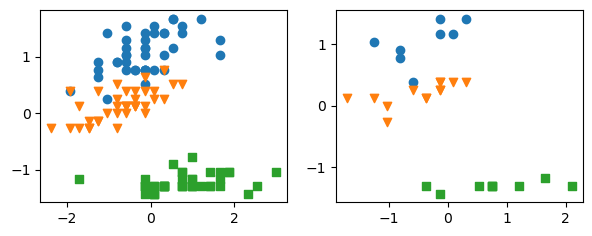

In [145]:
df = pd.read_csv('C:\\Users\dikss\Capstone Projects\Data-Science-Capstones\Perceptron\iris.data', index_col=None, header=None)
df.columns = ['x1', 'x2', 'x3', 'x4', 'y']

d = {'Iris-versicolor': 1,
     'Iris-virginica': 2,
     'Iris-setosa': 0,
}

df['y'] = df['y'].map(d)

# Assign features and target

X = torch.tensor(df[['x2', 'x4']].values, dtype=torch.float)
y = torch.tensor(df['y'].values, dtype=torch.int)

# Shuffling & train/test split

torch.manual_seed(123)
shuffle_idx = torch.randperm(y.size(0), dtype=torch.long)

X, y = X[shuffle_idx], y[shuffle_idx]

percent80 = int(shuffle_idx.size(0)*0.8)

X_train, X_test = X[shuffle_idx[:percent80]], X[shuffle_idx[percent80:]]
y_train, y_test = y[shuffle_idx[:percent80]], y[shuffle_idx[percent80:]]

# Normalize (mean zero, unit variance)

mu, sigma = X_train.mean(dim=0), X_train.std(dim=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma


fig, ax = plt.subplots(1, 2, figsize=(7, 2.5))
ax[0].scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1])
ax[0].scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], marker='v')
ax[0].scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], marker='s')
ax[1].scatter(X_test[y_test == 2, 0], X_test[y_test == 2, 1])
ax[1].scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], marker='v')
ax[1].scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], marker='s')
plt.show()

In [153]:
model = Logistic(X_train.numpy(),y_train.numpy(),1000,0.001)
model.train()
print("Test Accuracy: ",model.test_accuracy(X_test.numpy(),y_test.numpy()))

Epoch : 1 || Loss => 1.0986 || Accuracy => 0.3417
----------------------
Epoch : 2 || Loss => 1.0469 || Accuracy => 0.8333
----------------------
Epoch : 3 || Loss => 1.0000 || Accuracy => 0.8333
----------------------
Epoch : 4 || Loss => 0.9576 || Accuracy => 0.8333
----------------------
Epoch : 5 || Loss => 0.9193 || Accuracy => 0.8333
----------------------
Epoch : 6 || Loss => 0.8846 || Accuracy => 0.8333
----------------------
Epoch : 7 || Loss => 0.8531 || Accuracy => 0.8333
----------------------
Epoch : 8 || Loss => 0.8246 || Accuracy => 0.8333
----------------------
Epoch : 9 || Loss => 0.7985 || Accuracy => 0.8333
----------------------
Epoch : 10 || Loss => 0.7748 || Accuracy => 0.8333
----------------------
Epoch : 11 || Loss => 0.7530 || Accuracy => 0.8333
----------------------
Epoch : 12 || Loss => 0.7331 || Accuracy => 0.8333
----------------------
Epoch : 13 || Loss => 0.7147 || Accuracy => 0.8333
----------------------
Epoch : 14 || Loss => 0.6978 || Accuracy => 0.8

C:\Users\dikss\AppData\Local\Temp\ipykernel_30964\816947699.py:25: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax1.set_xlim([class_1_feature_1.min() , class_1_feature_1.max() ])
C:\Users\dikss\AppData\Local\Temp\ipykernel_30964\816947699.py:26: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax1.set_ylim([class_1_feature_2.min() , class_1_feature_2.max() ])
C:\Users\dikss\AppData\Local\Temp\ipykernel_30964\816947699.py:37: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax2.set_xlim([class_2_feature_1.min() , class_2_feature_1.max() ])
C:\Users\dikss\AppData\Local\Temp\ipykernel_30964\816947699.py:38: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax2.set_ylim([class_2_feature_2.min() , class_2_feature_2.m

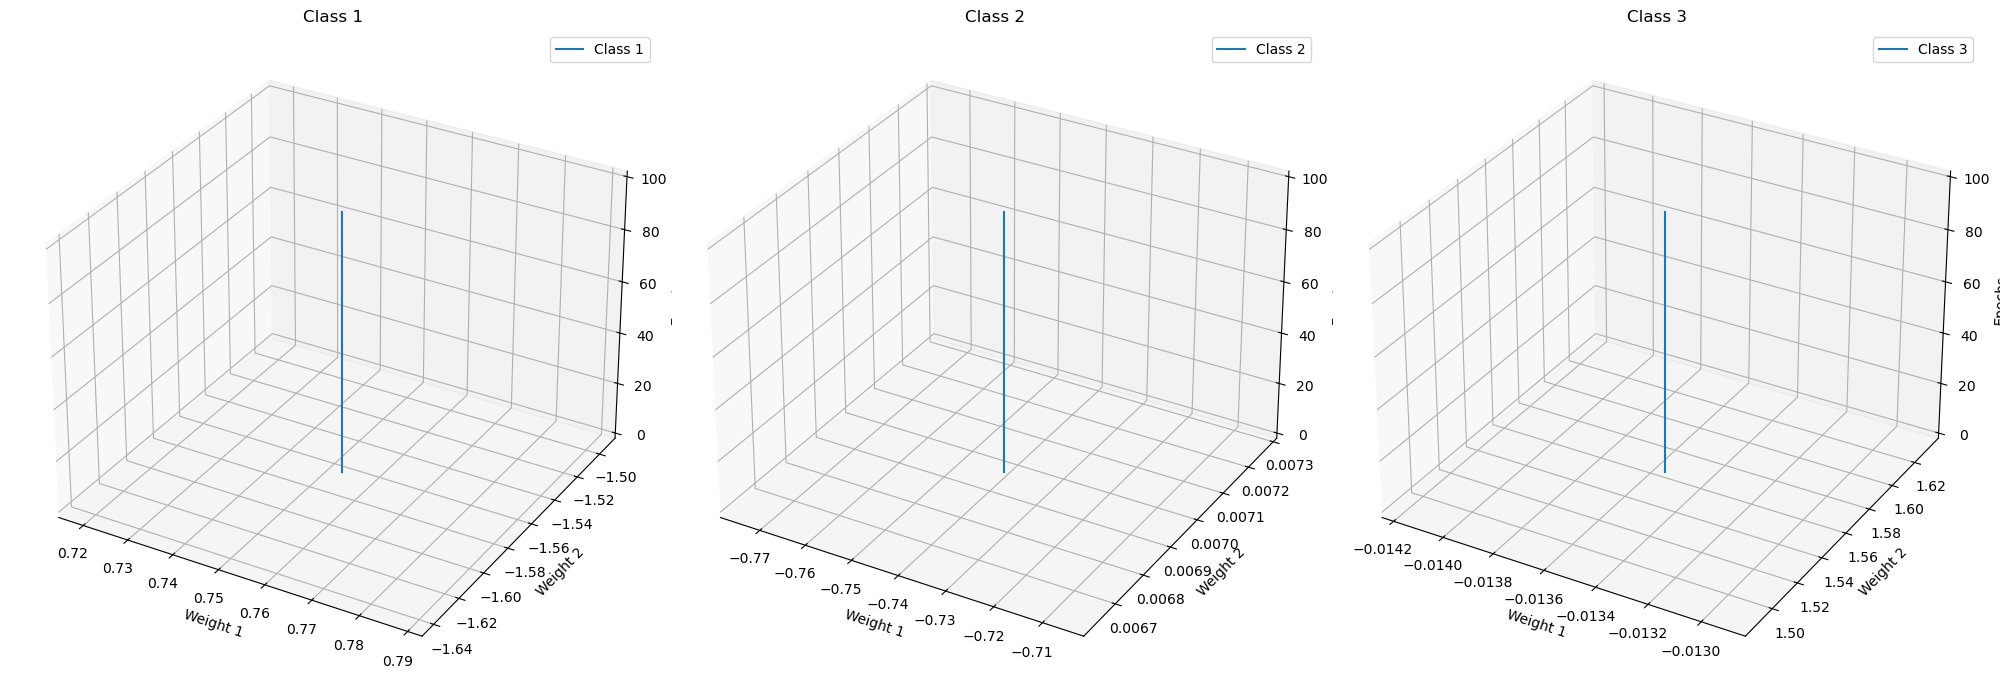

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming Weights_array and Bias_array are already defined
Weights_array = np.array(model.Weights_array)
Bias_array = np.array(model.Bias_array)

# Extracting the weights for each class
class_1_feature_1 = Weights_array[:, 0, 0]
class_1_feature_2 = Weights_array[:, 1, 0]
class_2_feature_1 = Weights_array[:, 0, 1]
class_2_feature_2 = Weights_array[:, 1, 1]
class_3_feature_1 = Weights_array[:, 0, 2]
class_3_feature_2 = Weights_array[:, 1, 2]

epochs = np.arange(Weights_array.shape[0])

# Creating a figure with 3 subplots
fig = plt.figure(figsize=(20, 10))

# Subplot 1 for Class 1
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot(class_1_feature_1, class_1_feature_2, epochs, label='Class 1')
ax1.set_xlim([class_1_feature_1.min() , class_1_feature_1.max() ])
ax1.set_ylim([class_1_feature_2.min() , class_1_feature_2.max() ])
ax1.set_zlim([0, epochs.max()])
ax1.set_xlabel('Weight 1')
ax1.set_ylabel('Weight 2')
ax1.set_zlabel('Epochs')
ax1.set_title('Class 1')
ax1.legend()

# Subplot 2 for Class 2
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot(class_2_feature_1, class_2_feature_2, epochs, label='Class 2')
ax2.set_xlim([class_2_feature_1.min() , class_2_feature_1.max() ])
ax2.set_ylim([class_2_feature_2.min() , class_2_feature_2.max() ])
ax2.set_zlim([0, epochs.max()])
ax2.set_xlabel('Weight 1')
ax2.set_ylabel('Weight 2')
ax2.set_zlabel('Epochs')
ax2.set_title('Class 2')
ax2.legend()

# Subplot 3 for Class 3
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot(class_3_feature_1, class_3_feature_2, epochs, label='Class 3')
ax3.set_xlim([class_3_feature_1.min() , class_3_feature_1.max() ])
ax3.set_ylim([class_3_feature_2.min() , class_3_feature_2.max() ])
ax3.set_zlim([0, epochs.max()])
ax3.set_xlabel('Weight 1')
ax3.set_ylabel('Weight 2')
ax3.set_zlabel('Epochs')
ax3.set_title('Class 3')
ax3.legend()

plt.tight_layout()
plt.show()


In [148]:
! pip install torch

In [149]:
! pip install torch torchvision

In [150]:
# ! pip install keras
! pip install tensorflow

^C


In [ ]:
import numpy as np
from keras.datasets import mnist

# Load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
# train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
# test_images = test_images.astype('float32') / 255
model = Logistic(train_images,train_labels,1000,0.001)
model.train()
print("Test Accuracy: ",model.test_accuracy(test_images,test_labels))




Epoch : 1 || Loss => 2.3026 || Accuracy => 0.0987
----------------------


C:\Users\dikss\AppData\Local\Temp\ipykernel_30964\1618055034.py:46: RuntimeWarning: divide by zero encountered in log
  log_likelihood = -np.log(activation[range(m), np.argmax(self.Y_train, axis=1)])


Epoch : 2 || Loss => inf || Accuracy => 0.6718
----------------------
Epoch : 3 || Loss => inf || Accuracy => 0.3167
----------------------
Epoch : 4 || Loss => inf || Accuracy => 0.4599
----------------------
Epoch : 5 || Loss => inf || Accuracy => 0.4250
----------------------
Epoch : 6 || Loss => inf || Accuracy => 0.4091
----------------------
Epoch : 7 || Loss => inf || Accuracy => 0.4149
----------------------
Epoch : 8 || Loss => inf || Accuracy => 0.5181
----------------------
Epoch : 9 || Loss => inf || Accuracy => 0.4715
----------------------
Epoch : 10 || Loss => inf || Accuracy => 0.4095
----------------------
Epoch : 11 || Loss => inf || Accuracy => 0.6676
----------------------
Epoch : 12 || Loss => inf || Accuracy => 0.6623
----------------------
Epoch : 13 || Loss => inf || Accuracy => 0.6964
----------------------
Epoch : 14 || Loss => inf || Accuracy => 0.8220
----------------------
Epoch : 15 || Loss => inf || Accuracy => 0.8343
----------------------
Epoch : 16 || 